# Ramen_Ratings barplots analysis
#By- Aarush Kumar
#Dated: Sept. 20,2021

In [1]:
from IPython.display import Image
Image(url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTDnmjwui8HDUFo5u31MuriyYE4h557hilFO3Gq3MswsVhh--iBWKuQEuY_yaoq6GYgJSc&usqp=CAU')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/home/aarush100616/Downloads/Projects/Ramen Ratings Analysis/Data/ramen-ratings.csv")

In [4]:
data

Review #           Brand  \
0         2580       New Touch   
1         2579        Just Way   
2         2578          Nissin   
3         2577         Wei Lih   
4         2576  Ching's Secret   
...        ...             ...   
2575         5           Vifon   
2576         4         Wai Wai   
2577         3         Wai Wai   
2578         2         Wai Wai   
2579         1        Westbrae   

                                                Variety Style   Country Stars  \
0                             T's Restaurant Tantanmen    Cup     Japan  3.75   
1     Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack    Taiwan     1   
2                         Cup Noodles Chicken Vegetable   Cup       USA  2.25   
3                         GGE Ramen Snack Tomato Flavor  Pack    Taiwan  2.75   
4                                       Singapore Curry  Pack     India  3.75   
...                                                 ...   ...       ...   ...   
2575  Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...  Bowl   Vietnam   3.5   
2576                     Oriental Style Instant Noodles  Pack  Thailand     1   
2577                                     Tom Yum Shrimp  Pack  Thailand     2   
2578                               Tom Yum Chili Flavor  Pack  Thailand     2   
2579                                         Miso Ramen  Pack       USA   0.5   

     Top Ten  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
2575     NaN  
2576     NaN  
2577     NaN  
2578     NaN  
2579     NaN  

[2580 rows x 7 columns]

In [5]:
data.shape

(2580, 7)

In [6]:
data.size

18060

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [8]:
data.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [9]:
data.describe()

Review #
count  2580.000000
mean   1290.500000
std     744.926171
min       1.000000
25%     645.750000
50%    1290.500000
75%    1935.250000
max    2580.000000

In [10]:
data.describe().T

count    mean         std  min     25%     50%      75%     max
Review #  2580.0  1290.5  744.926171  1.0  645.75  1290.5  1935.25  2580.0

In [11]:
data['Country'].unique()

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'], dtype=object)

In [12]:
data['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar', nan],
      dtype=object)

## Data Cleaning

In [13]:
data.Stars.value_counts()

4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
1           26
0           26
2.25        21
0.5         14
0.25        11
1.25        10
5.0         10
3.50         9
5.00         7
4.00         6
4.3          4
3.8          3
Unrated      3
4.50         3
4.0          3
3.0          2
2.3          2
2.8          2
3.1          2
2.9          2
4.125        2
1.1          2
0.1          1
3.3          1
1.8          1
3.125        1
3.7          1
3.65         1
0.9          1
2.125        1
2.85         1
0.75         1
3.00         1
3.6          1
2.1          1
3.2          1
3.4          1
Name: Stars, dtype: int64

In [14]:
data.drop(data.loc[data['Stars']=='Unrated'].index, inplace=True)

In [15]:
numeric_Stars = pd.to_numeric(data.Stars)
data.Stars = numeric_Stars

In [16]:
japan_cup_data = data[(data.Style == 'Cup') & (data.Country == 'Japan')]
japan_cup_data

Review #            Brand                                     Variety  \
0         2580        New Touch                   T's Restaurant Tantanmen    
6         2574          Acecook         Spice Deli Tantan Men With Cilantro   
112       2468          Acecook                       Dossari Yasai Chanpon   
147       2433           Nissin            Cup Noodles Indonesia Mie Goreng   
151       2429        New Touch                  T's Restaurant Sura Tanmen   
209       2371          Daikoku                                 Tanuki Soba   
221       2359          Daikoku                                Kitsune Udon   
227       2353           Nissin  Cup Noodles Rich Garlic, Egg Yolk & Oxtail   
260       2320           Nissin    Nupasta Bolognese Flavour Instant Noodle   
264       2316           Nissin              Cup Noodle Spicy Curry Chicken   
315       2265           Nissin    Cup Noodles Rich Soft Shelled Turle Soup   
343       2237           Nissin               Cup Noodle Light+ Bagna Cauda   
359       2221           Nissin                          Cup Noodle Seafood   
452       2128  Sapporo Ichiban   Taimeiken Yousyoku Yasangatsukutta Omumen   
478       2102           Nissin                 Cup Noodles Singapore Laksa   
520       2060           Nissin             Cup Noodle Light+ Cheese Fondue   
545       2035          Acecook                         Maru Uma Curry Udon   
561       2019          Acecook                      Seabura Tonkotsu Ramen   
578       2002           Nissin                   Cup Noodles Tom Yum Goong   
579       2001           Nissin         Cup Noodle Big Seafood Clam Chowder   
581       1999           Nissin                                  Curry Udon   
583       1997           Nissin    Cup Noodle Vegeta Buta-kyabetsu Tonkotsu   
584       1996           Nissin     Cup Noodle Pasta Style Tarako Spaghetti   
585       1995           Nissin        Cup Noodle Big Cheese Mexican Chilli   
588       1992           Nissin           Cup Noodle Light Plus Ratatouille   
589       1991           Nissin                Cup Noodle Milk Chikin Ramen   
590       1990           Nissin                                  Cup Noodle   
601       1979           Nissin                       BIG Cup Noodle Ajillo   
624       1956         Maruchan                    Spicy Tomato Salsa Ramen   
640       1940           Nissin            Cup Noodle Pasta Style Bolognese   
669       1911           Nissin           Emergency Chikin Ramen Cup Noodle   
683       1897           Nissin                   Cup Noodle Massaman Curry   
687       1893           Nissin                              Cup Noodle Sio   
720       1860           Nissin             Cupo Noodle Pasta Style Vongole   
878       1702    Samyang Foods                              Seafood Noodle   
986       1594          Acecook                Jan Jan Dashi Shoyu Yakisoba   
1013      1567           Nissin                        Emergency Cup Noodle   
1032      1548    Samyang Foods                                Curry Noodle   
1273      1307           Nissin                     Cup Noodle Cheese Curry   
1317      1263           Nissin    Cup Noodle Curry X Gunpla RX-78-2 Gundam   
1360      1220           Nissin        Ultraman Instant Noodle Pork Flavour   
1383      1197           Nissin                    Cup Noodle Chilli Tomato   
1396      1184  Sapporo Ichiban                         Pokemon Shoyu Ramen   
1410      1170          Acecook                            Jan Jan Yakisoba   
1497      1083           Nissin                      GooTa Demi Hamburg-Men   
1513      1067           Nissin                        Cup Noodle Red Shock   
1547      1033           Nissin         King Cup Noodle BBQ Chicken & Onion   
1750       830     Seven-Eleven                             Seven & I Shoyu   
1755       825            Paldo                                       Shoyu   

     Style Country  Stars Top Ten  
0      Cup   Japan 

In [17]:
japan_cup_brand_average_rating = japan_cup_data.groupby('Brand').Stars.mean()
japan_cup_brand_average_rating 

Brand
Acecook            3.583333
Daikoku            2.750000
Maruchan           0.000000
New Touch          3.875000
Nissin             4.268750
Paldo              3.250000
Samyang Foods      3.250000
Sapporo Ichiban    3.750000
Seven-Eleven       4.500000
Name: Stars, dtype: float64

In [18]:
sorted_brand_names = sorted(pd.Series(japan_cup_data.Brand.unique()))
sorted_brand_names

['Acecook',
 'Daikoku',
 'Maruchan',
 'New Touch',
 'Nissin',
 'Paldo',
 'Samyang Foods',
 'Sapporo Ichiban',
 'Seven-Eleven']

## Data Visualization

No handles with labels found to put in legend.


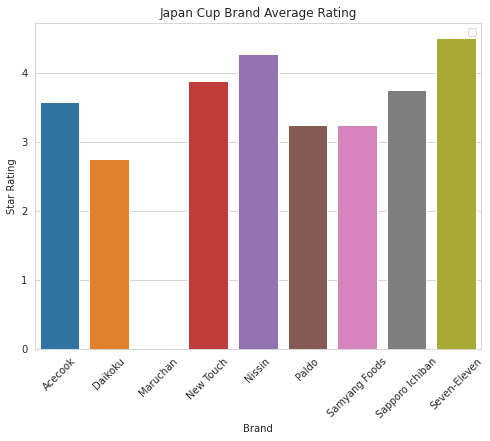

In [19]:
sns.set_style("whitegrid") # "darkgrid", "whitegrid", "dark", "white", "ticks"
plt.figure(figsize = (8,6))
plt.title("Japan Cup Brand Average Rating", fontsize = 12)
sns.barplot(x = sorted_brand_names, y = japan_cup_brand_average_rating)
plt.xlabel("Brand")
plt.ylabel("Star Rating")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [20]:
#Shows the variety of cup ramen by each brand. 
brand_count = japan_cup_data.groupby('Brand').Brand.count()
brand_count

Brand
Acecook             6
Daikoku             2
Maruchan            1
New Touch           2
Nissin             32
Paldo               1
Samyang Foods       2
Sapporo Ichiban     2
Seven-Eleven        1
Name: Brand, dtype: int64

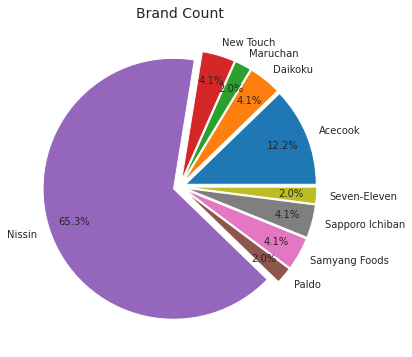

In [21]:
pie, ax = plt.subplots(figsize=[10,6])
labels = sorted_brand_names
plt.pie(x= brand_count, autopct="%.1f%%", explode = [0.05]*9, labels=labels, pctdistance=0.8)
plt.title("Brand Count", fontsize=14);

In [22]:
list_of_countries = data['Country'].unique()
list_of_styles = data['Style'].unique()  

In [23]:
# Cleans the data by: dropping 'unrated' values and 
# changing object values to numerical ones in the Stars column.
def data_wrangling():
    data.drop(data.loc[data['Stars']=='Unrated'].index, inplace=True)
    numeric_Stars = pd.to_numeric(data.Stars)
    data.Stars = numeric_Stars

In [24]:
def graph(country_name, style_name, x_values, y_values ):
    sns.set_style("whitegrid") # "darkgrid", "whitegrid", "dark", "white", "ticks"
    plt.figure(figsize = (8,6))
    plt.title("{}'s Average Star Rating of {} Ramen".format(country_name,style_name), fontsize = 12)
    sns.barplot(x = x_values, y = y_values)
    plt.xlabel("Brand")
    plt.ylabel("Star Rating")
    plt.xticks(rotation = 60)
    plt.legend()
    plt.show()

/home/aarush100616/.local/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
No handles with labels found to put in legend.


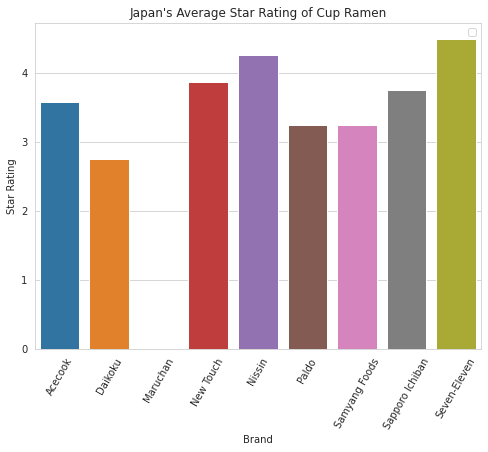

No handles with labels found to put in legend.


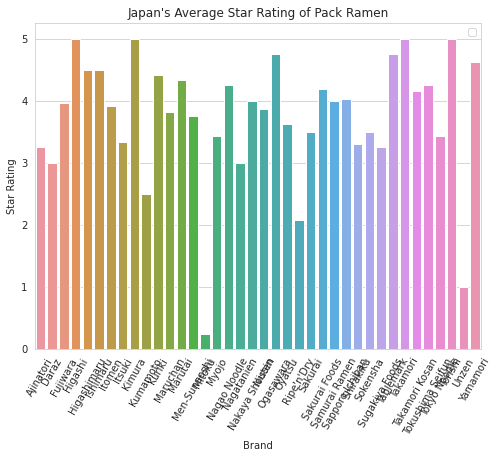

No handles with labels found to put in legend.


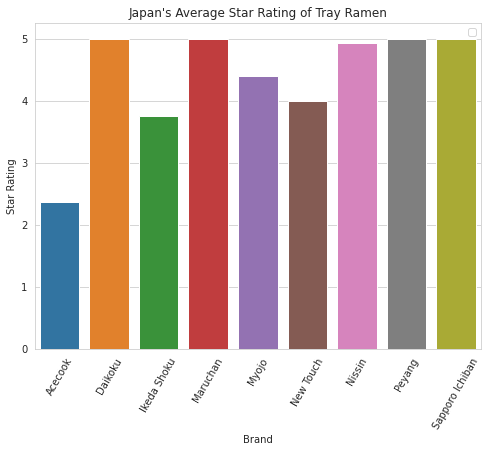

No handles with labels found to put in legend.


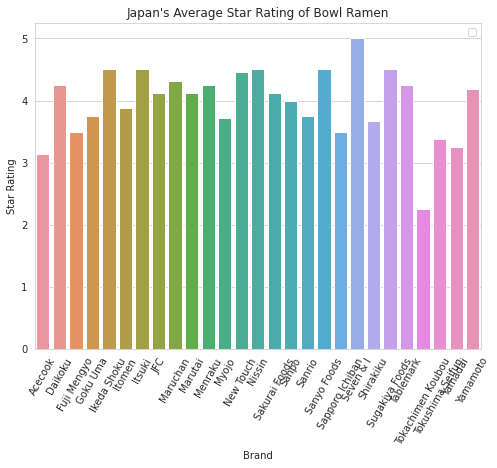

No handles with labels found to put in legend.


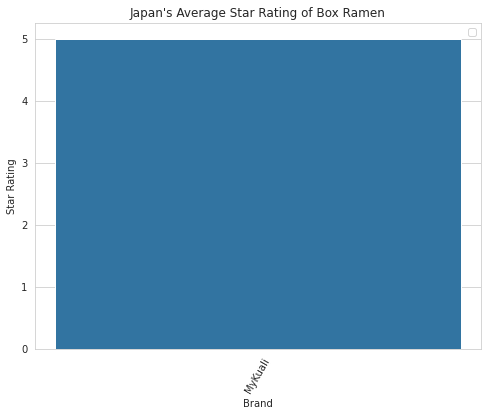

No handles with labels found to put in legend.


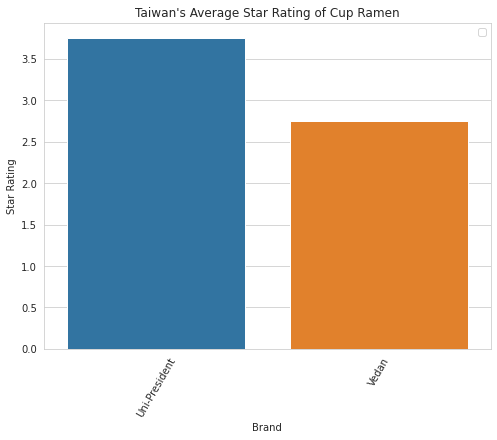

No handles with labels found to put in legend.


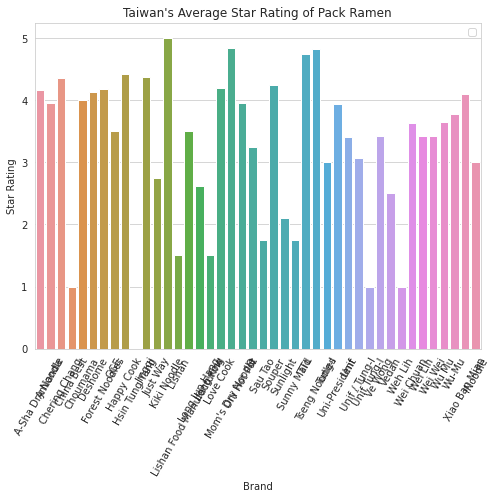

No handles with labels found to put in legend.


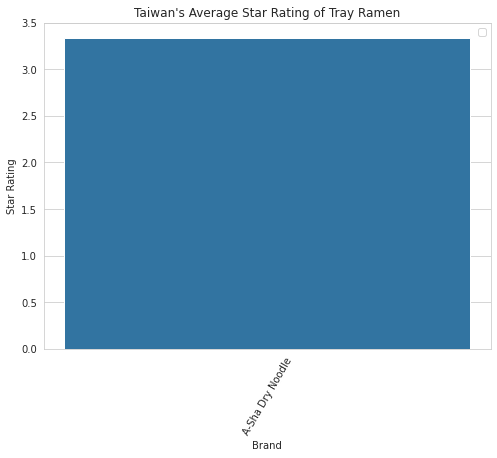

No handles with labels found to put in legend.


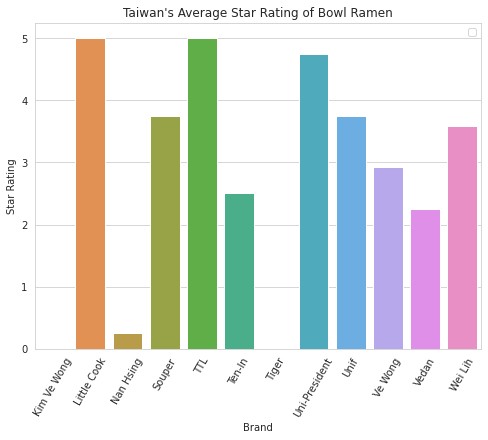

No handles with labels found to put in legend.


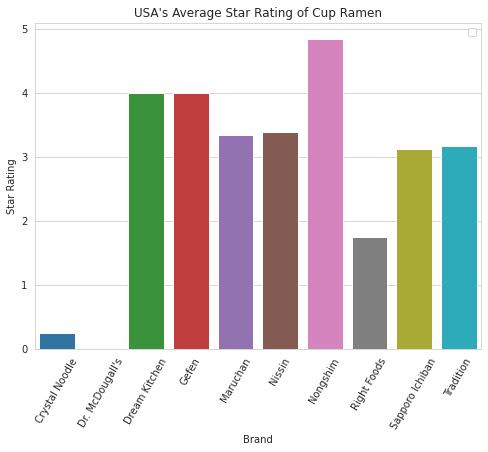

No handles with labels found to put in legend.


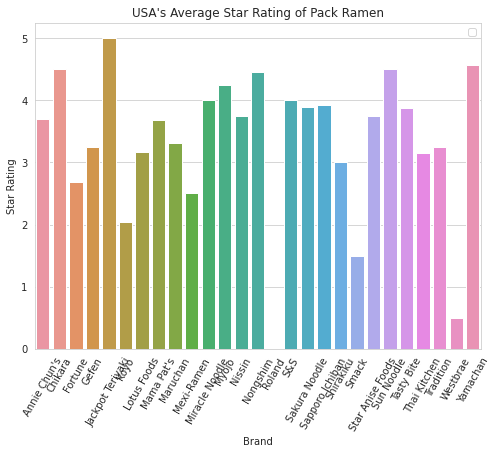

No handles with labels found to put in legend.


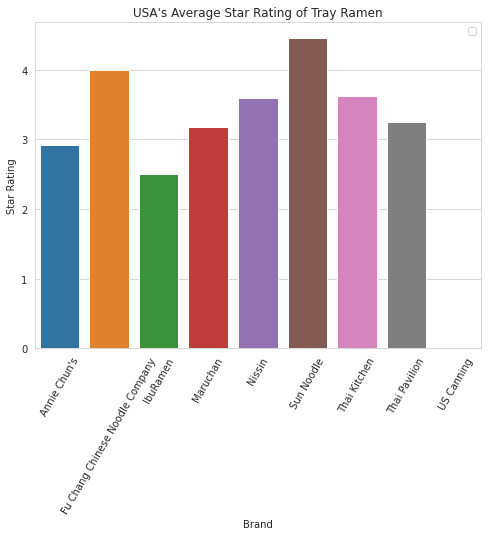

No handles with labels found to put in legend.


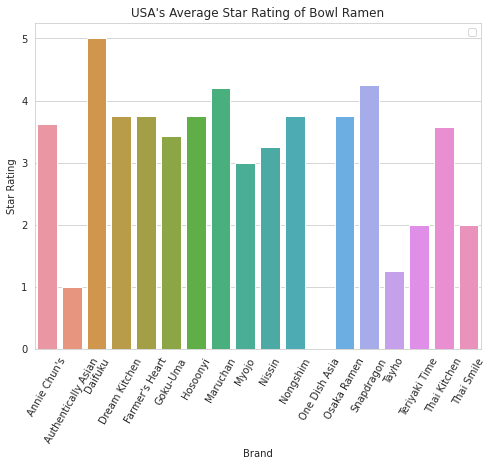

No handles with labels found to put in legend.


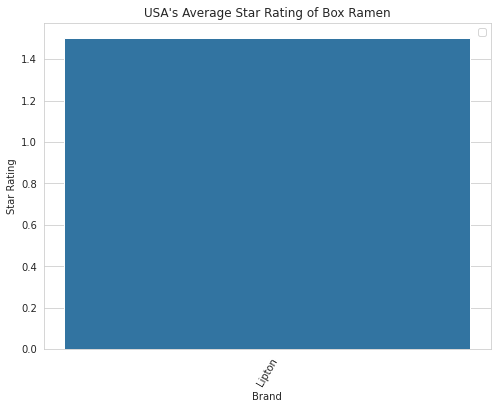

No handles with labels found to put in legend.


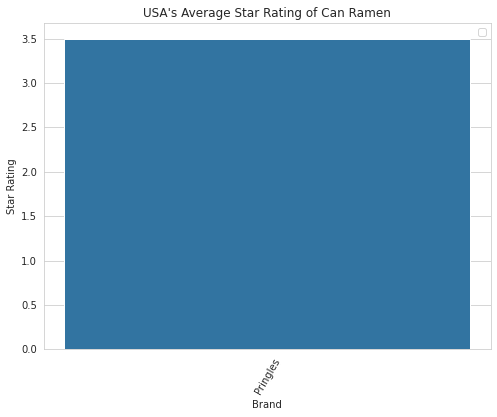

No handles with labels found to put in legend.


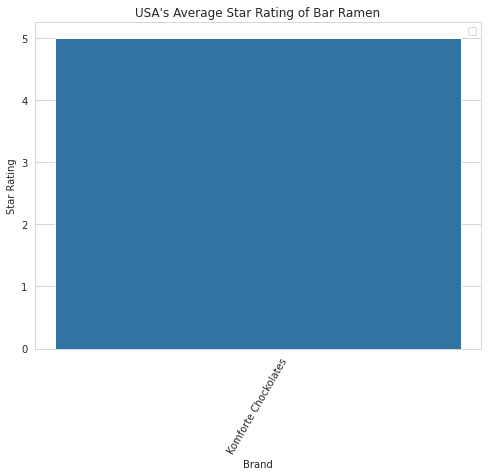

No handles with labels found to put in legend.


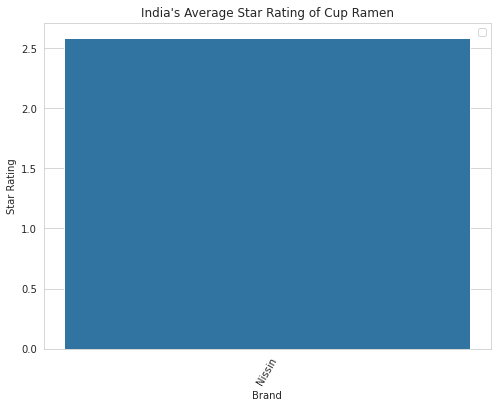

No handles with labels found to put in legend.


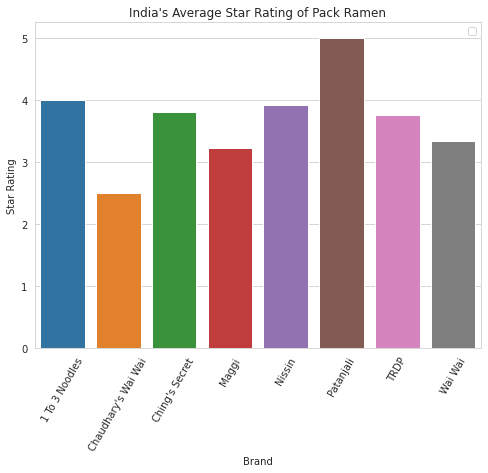

No handles with labels found to put in legend.


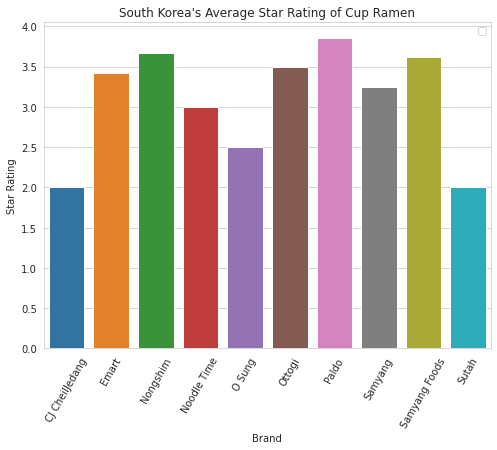

No handles with labels found to put in legend.


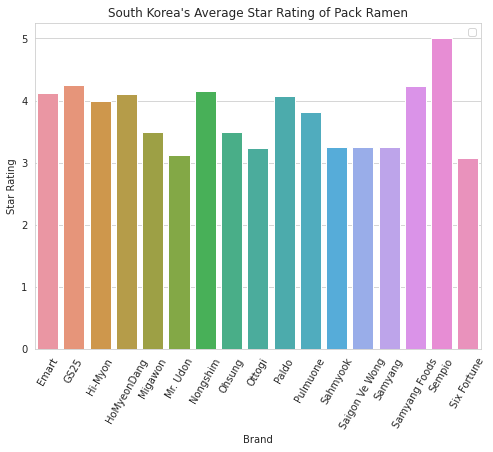

No handles with labels found to put in legend.


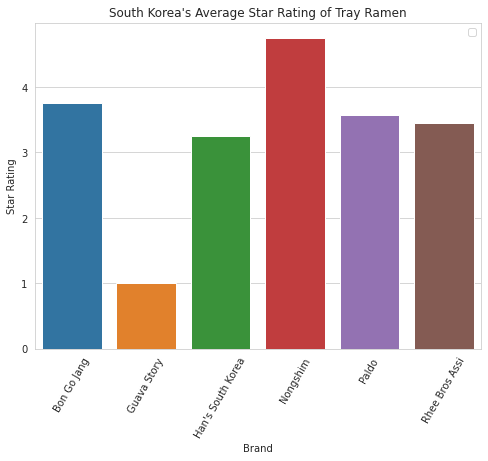

No handles with labels found to put in legend.


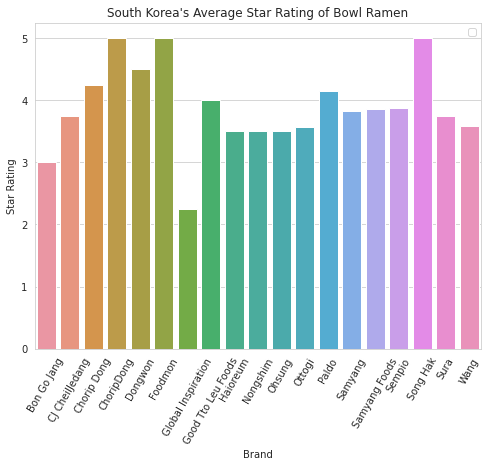

No handles with labels found to put in legend.


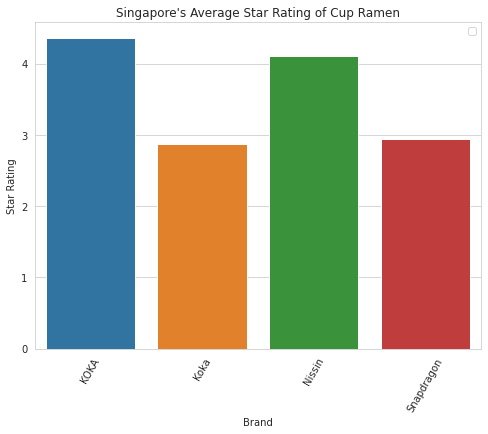

No handles with labels found to put in legend.


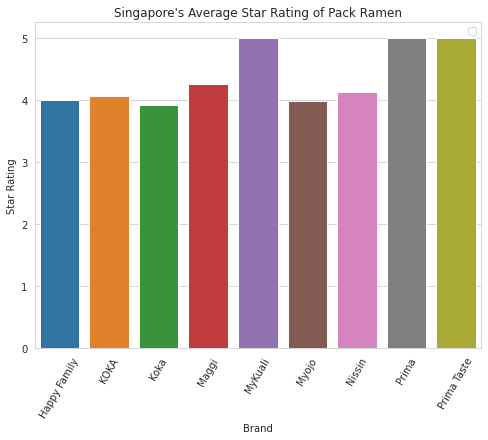

No handles with labels found to put in legend.


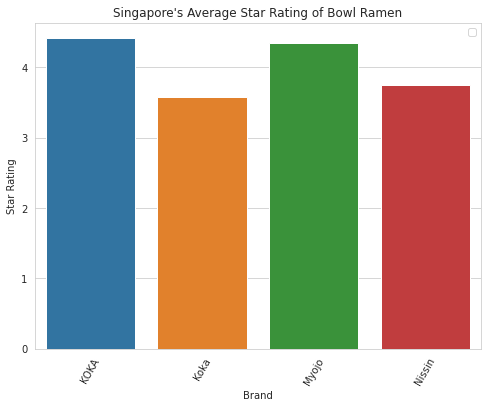

No handles with labels found to put in legend.


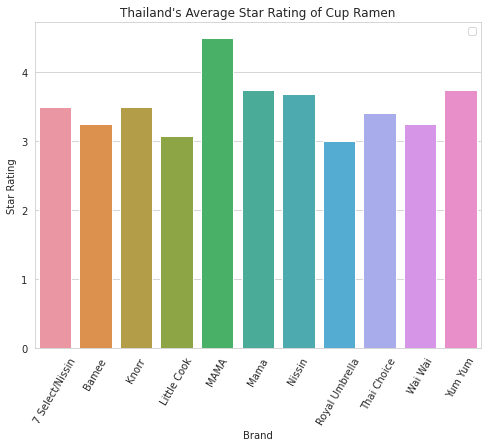

No handles with labels found to put in legend.


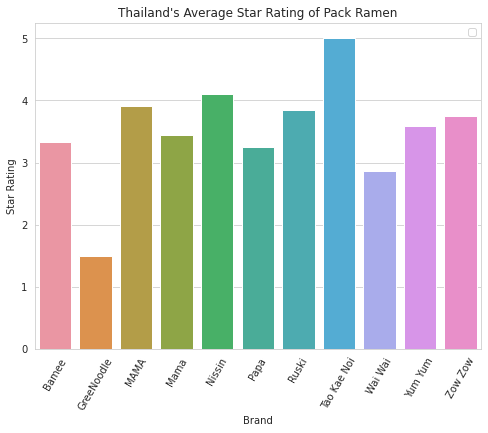

No handles with labels found to put in legend.


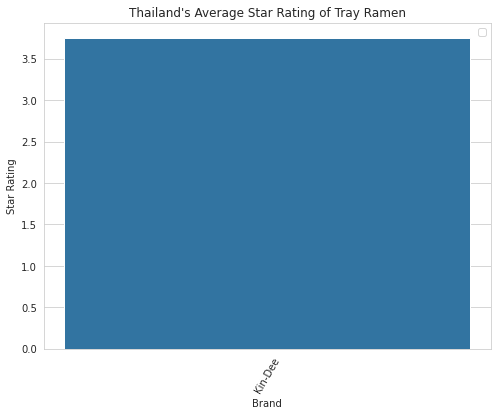

No handles with labels found to put in legend.


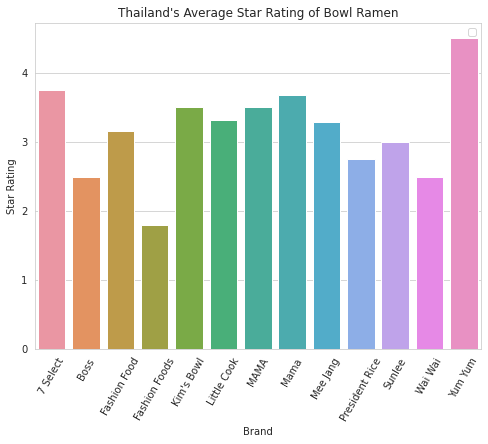

No handles with labels found to put in legend.


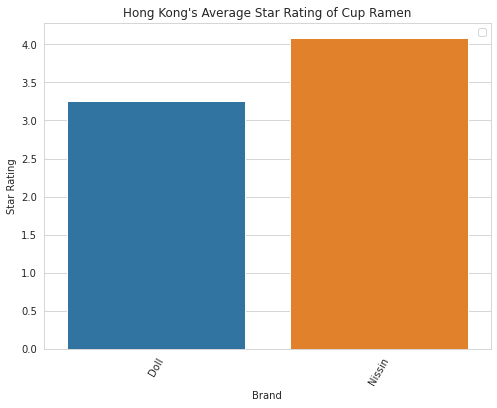

No handles with labels found to put in legend.


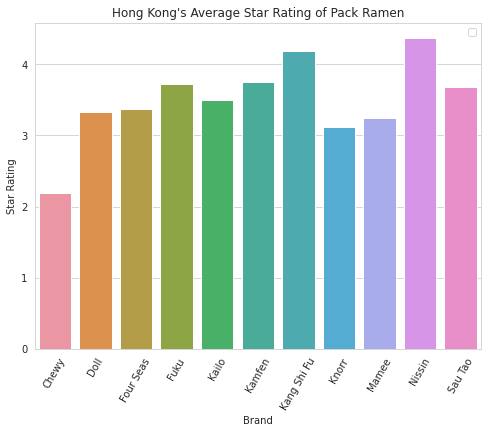

No handles with labels found to put in legend.


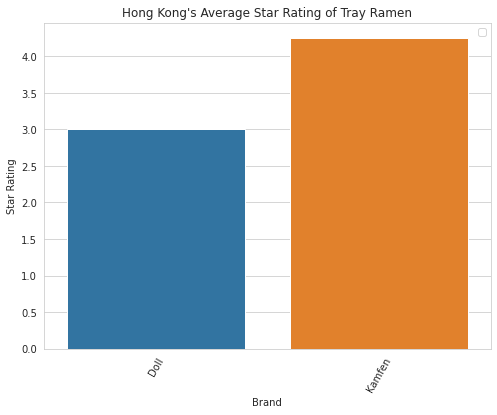

No handles with labels found to put in legend.


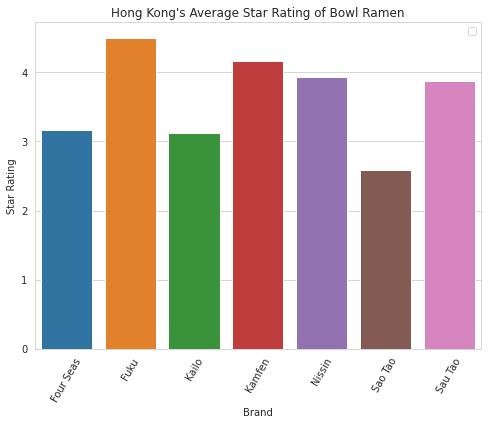

No handles with labels found to put in legend.


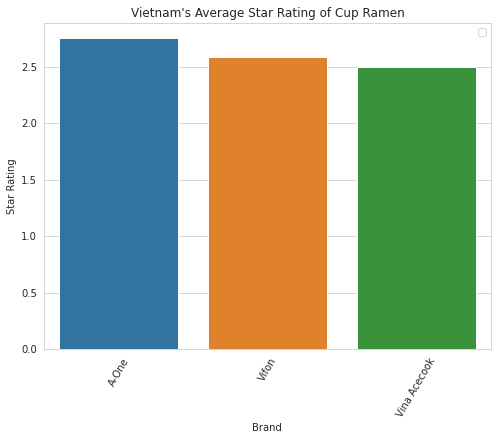

No handles with labels found to put in legend.


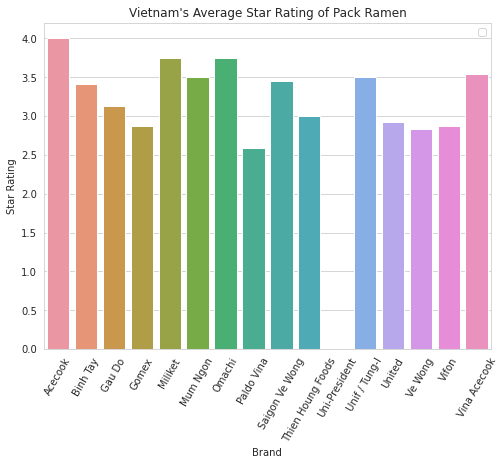

No handles with labels found to put in legend.


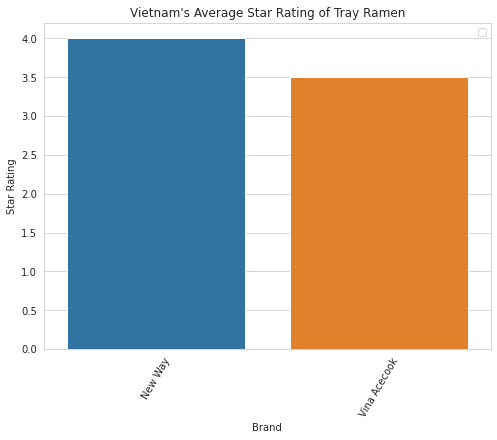

No handles with labels found to put in legend.


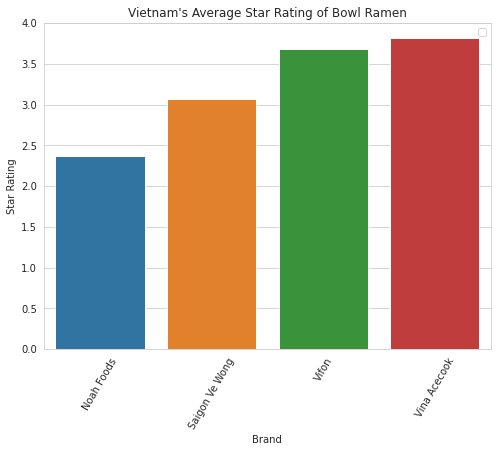

No handles with labels found to put in legend.


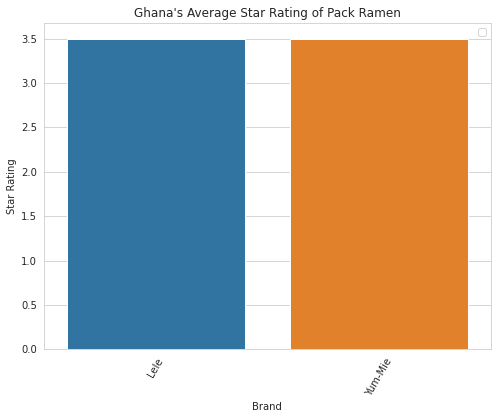

No handles with labels found to put in legend.


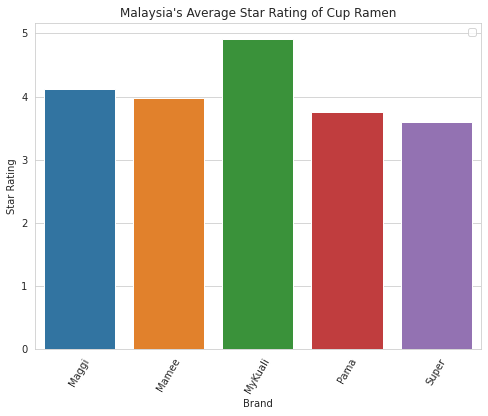

No handles with labels found to put in legend.


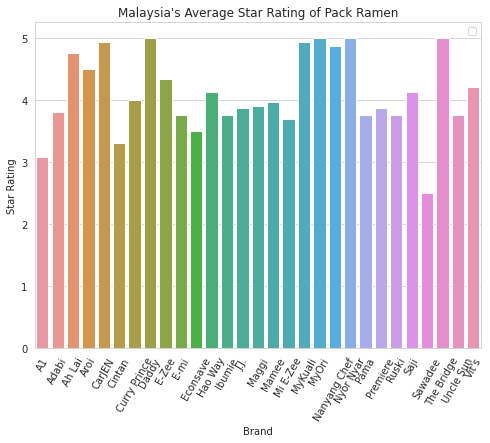

No handles with labels found to put in legend.


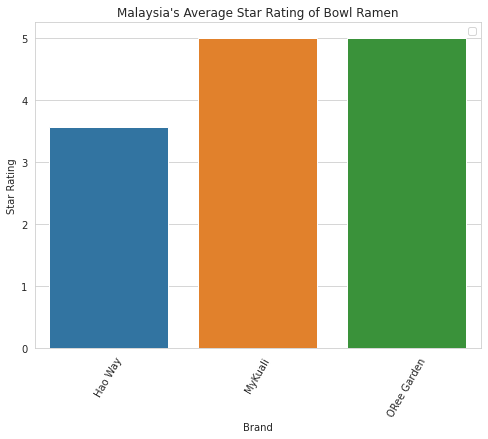

No handles with labels found to put in legend.


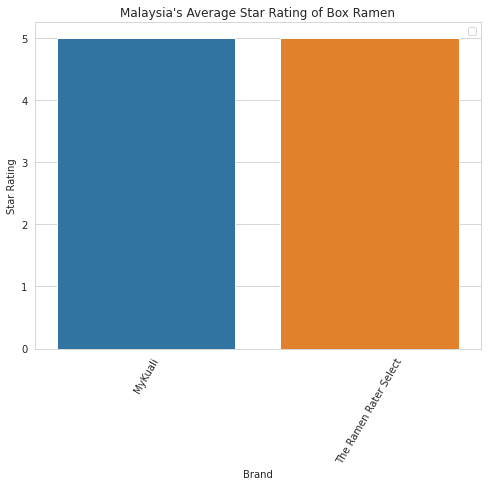

No handles with labels found to put in legend.


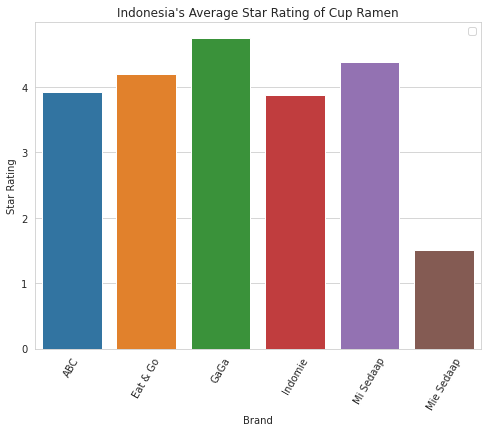

No handles with labels found to put in legend.


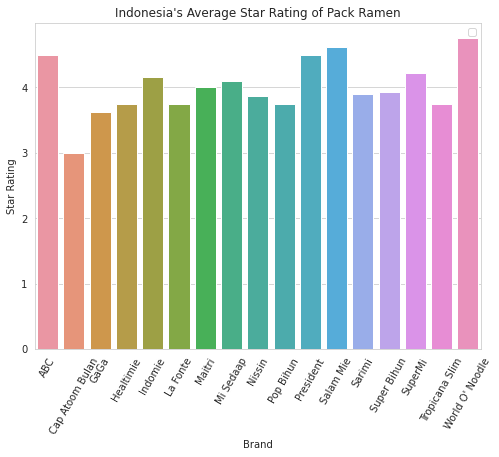

No handles with labels found to put in legend.


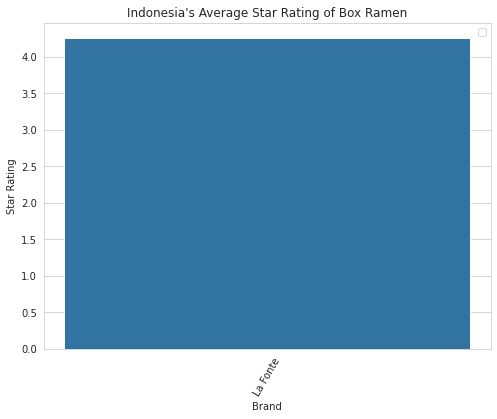

No handles with labels found to put in legend.


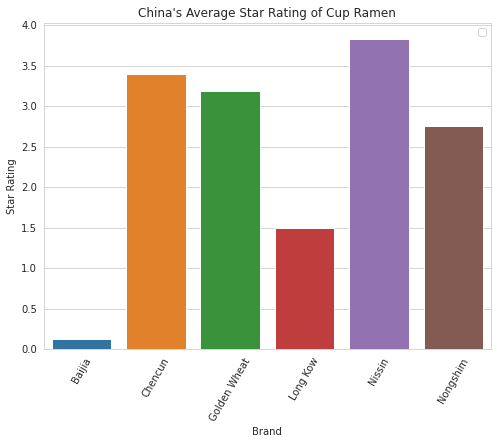

No handles with labels found to put in legend.


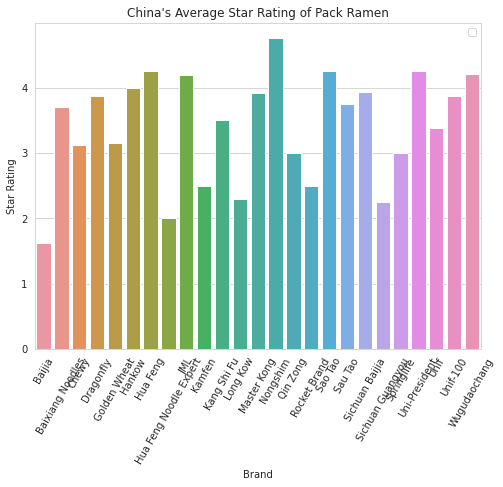

No handles with labels found to put in legend.


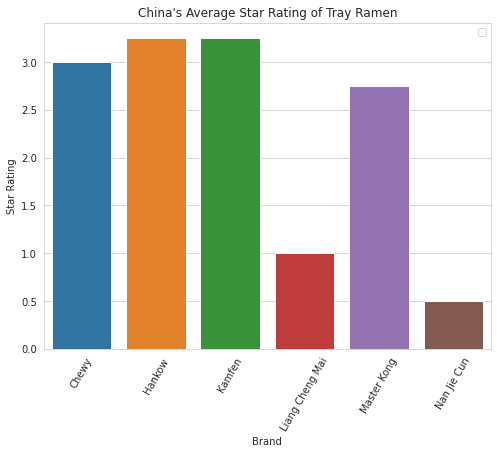

No handles with labels found to put in legend.


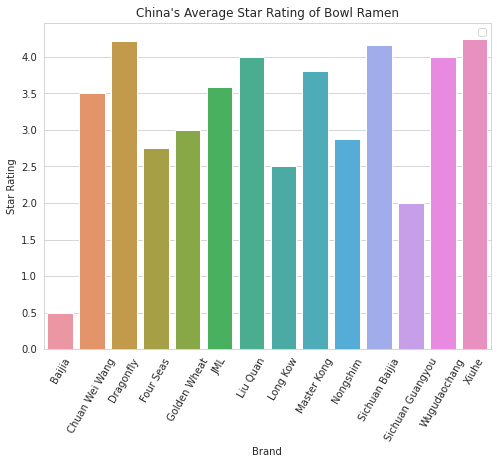

No handles with labels found to put in legend.


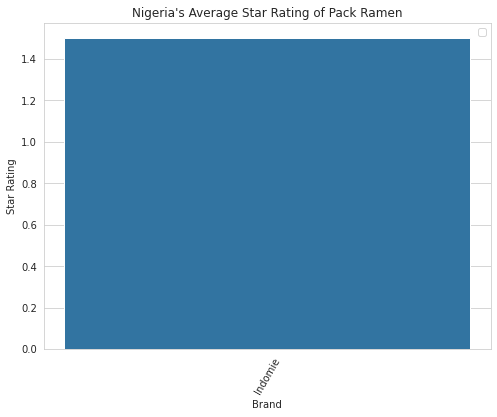

No handles with labels found to put in legend.


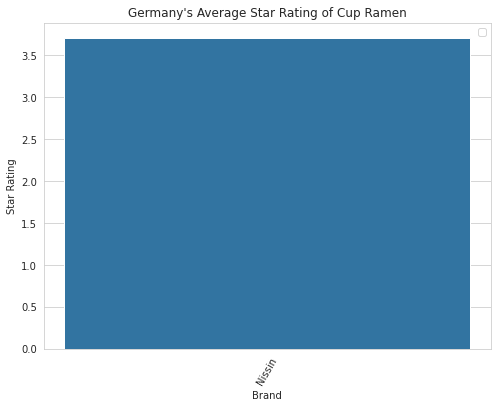

No handles with labels found to put in legend.


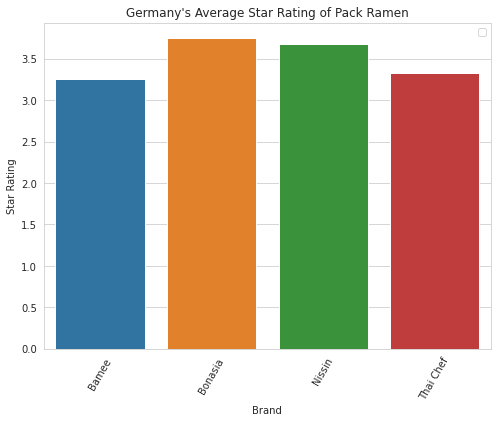

No handles with labels found to put in legend.


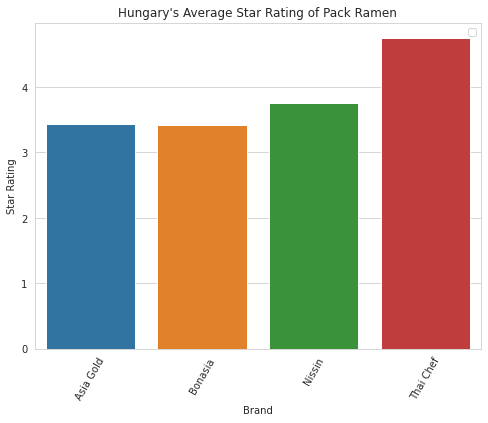

No handles with labels found to put in legend.


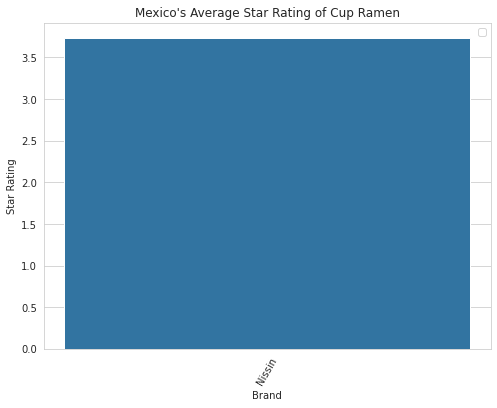

No handles with labels found to put in legend.


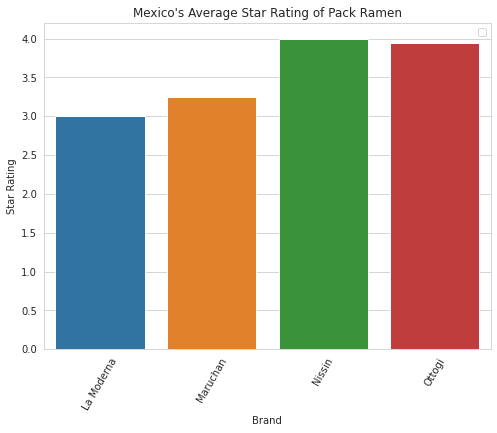

No handles with labels found to put in legend.


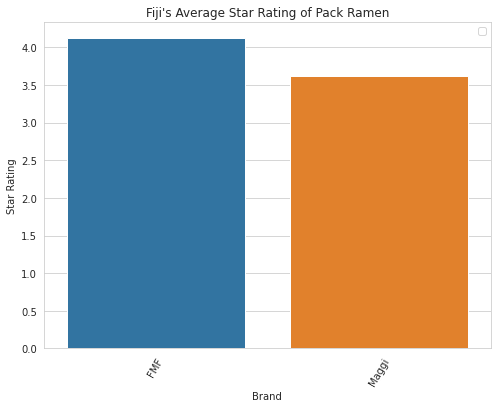

No handles with labels found to put in legend.


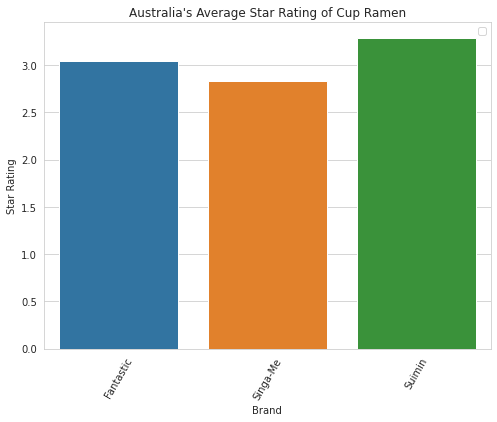

No handles with labels found to put in legend.


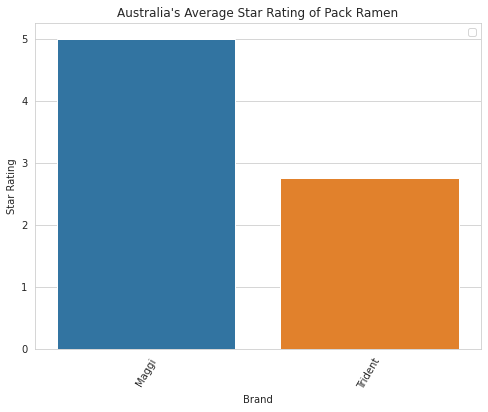

No handles with labels found to put in legend.


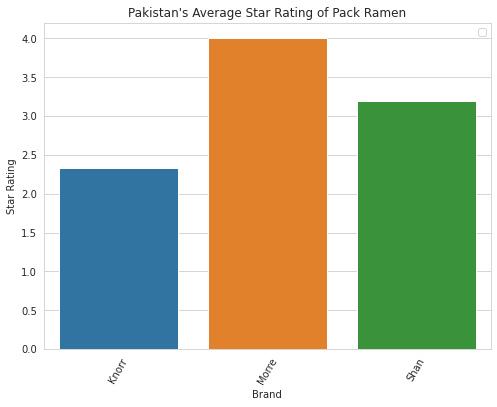

No handles with labels found to put in legend.


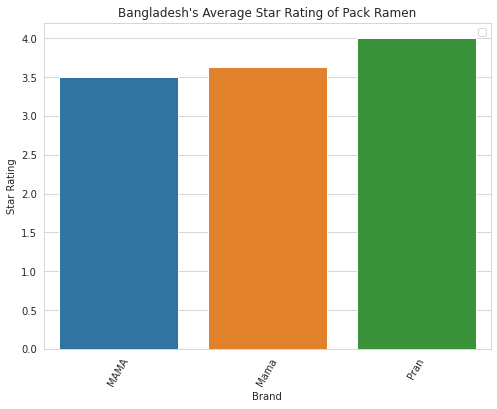

No handles with labels found to put in legend.


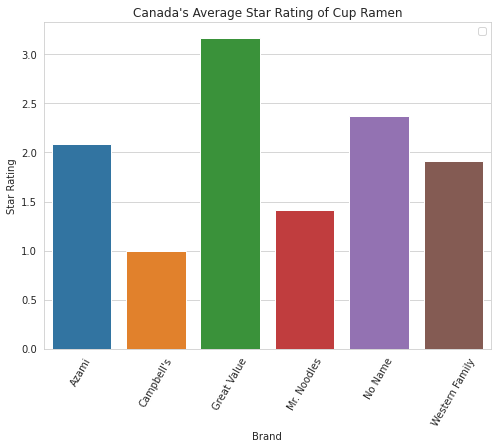

No handles with labels found to put in legend.


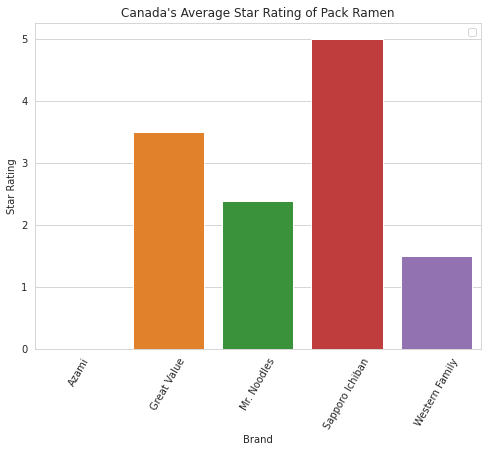

No handles with labels found to put in legend.


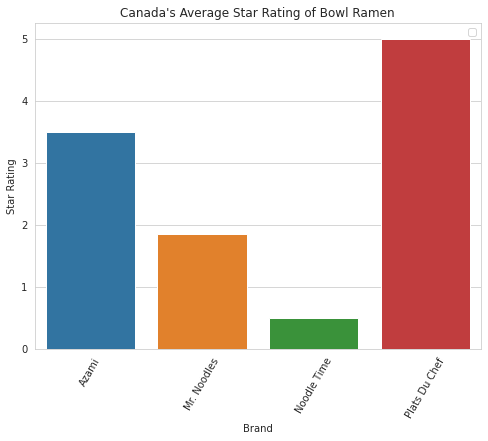

No handles with labels found to put in legend.


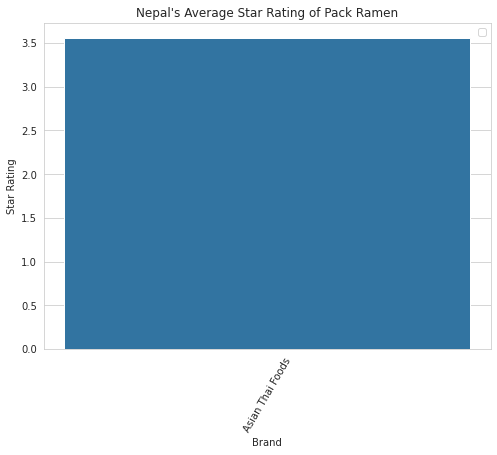

No handles with labels found to put in legend.


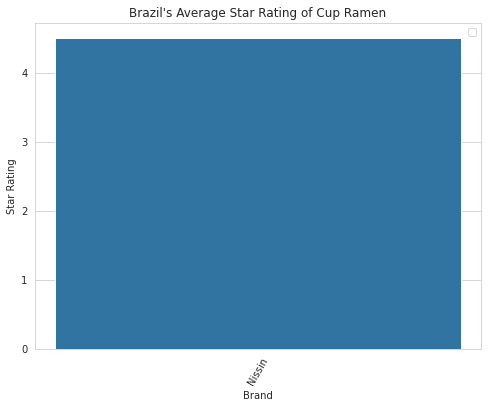

No handles with labels found to put in legend.


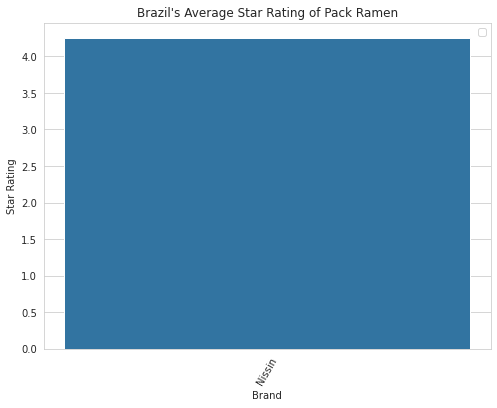

No handles with labels found to put in legend.


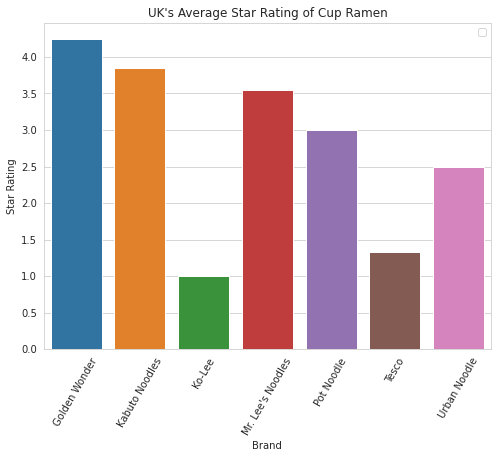

No handles with labels found to put in legend.


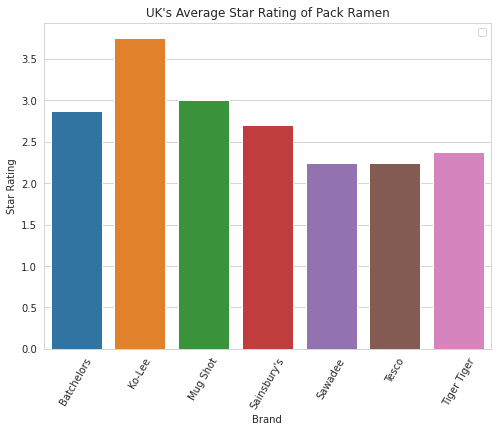

No handles with labels found to put in legend.


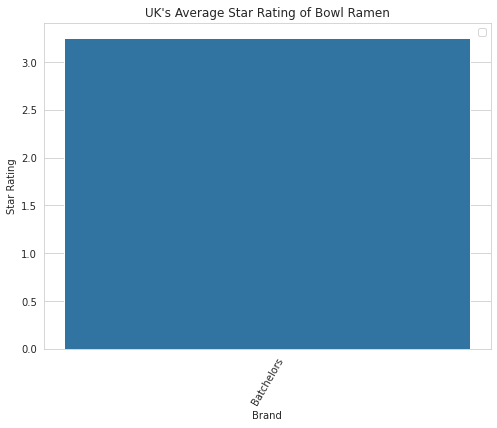

No handles with labels found to put in legend.


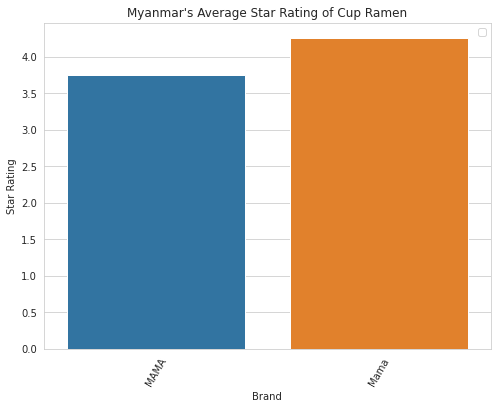

No handles with labels found to put in legend.


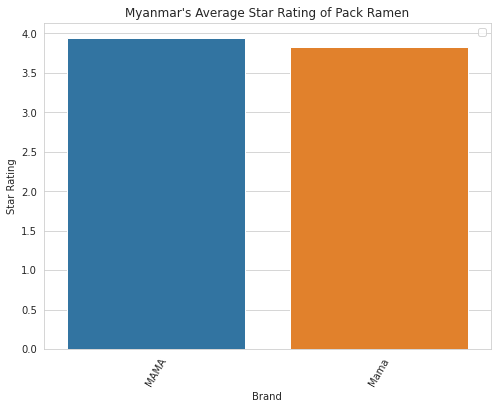

No handles with labels found to put in legend.


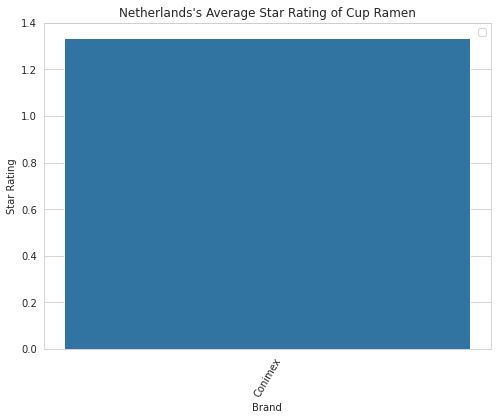

No handles with labels found to put in legend.


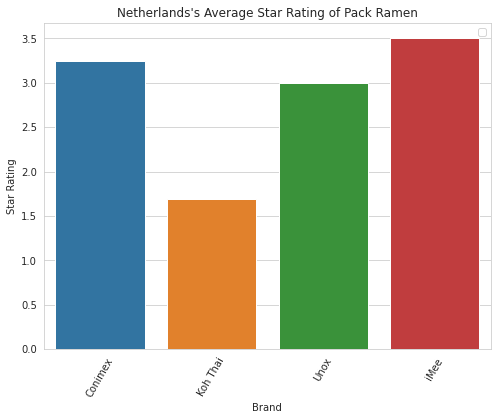

No handles with labels found to put in legend.


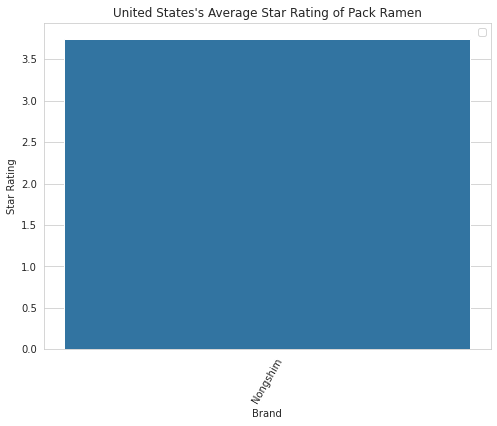

No handles with labels found to put in legend.


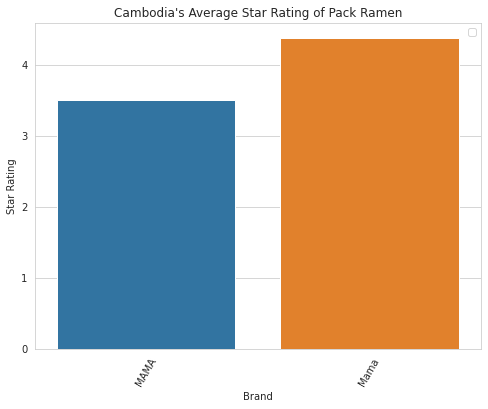

No handles with labels found to put in legend.


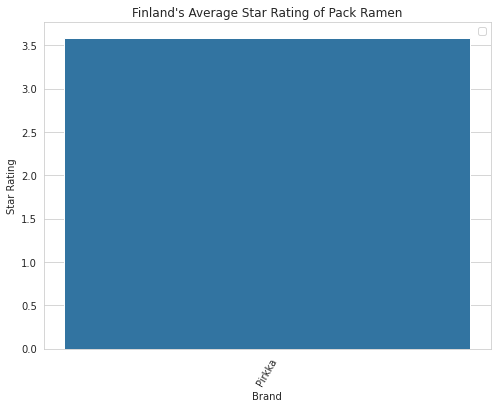

No handles with labels found to put in legend.


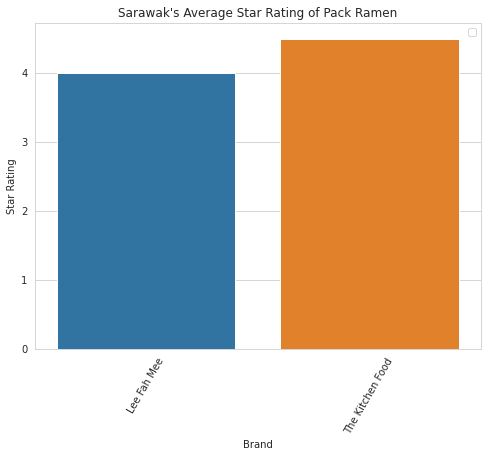

No handles with labels found to put in legend.


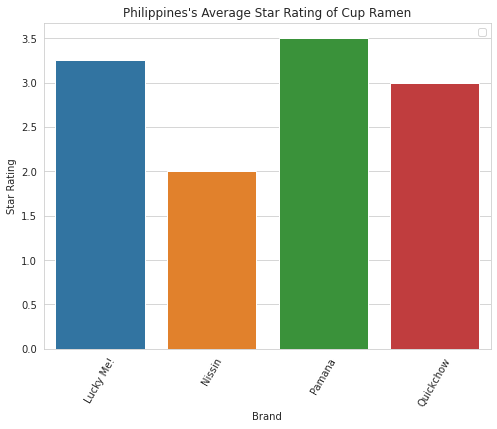

No handles with labels found to put in legend.


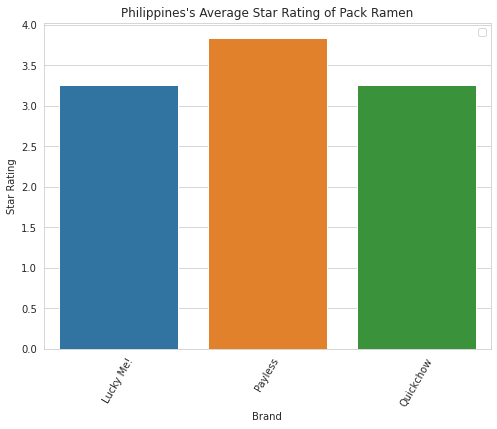

No handles with labels found to put in legend.


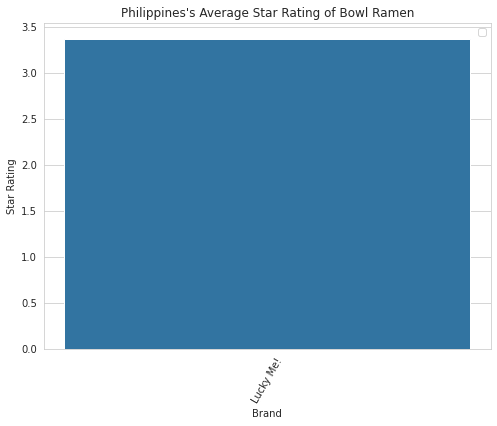

No handles with labels found to put in legend.


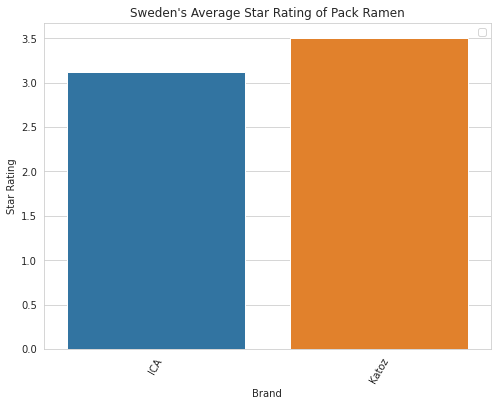

No handles with labels found to put in legend.


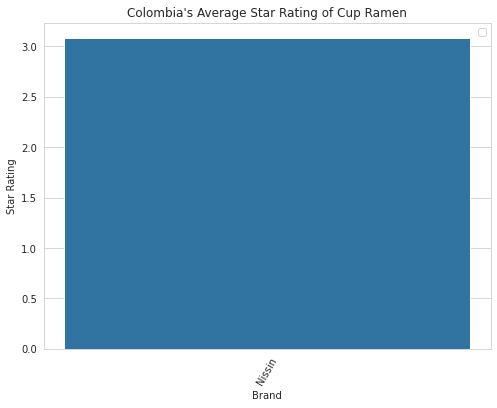

No handles with labels found to put in legend.


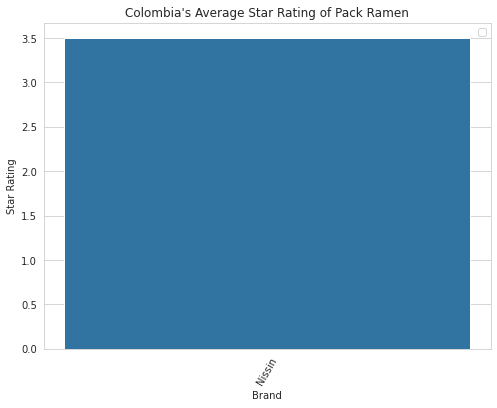

No handles with labels found to put in legend.


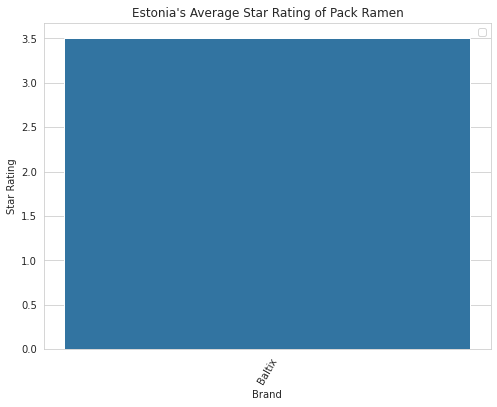

No handles with labels found to put in legend.


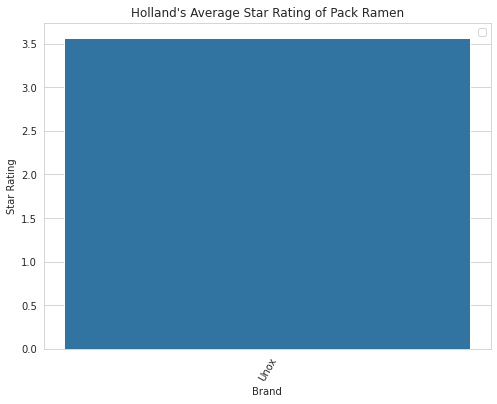

No handles with labels found to put in legend.


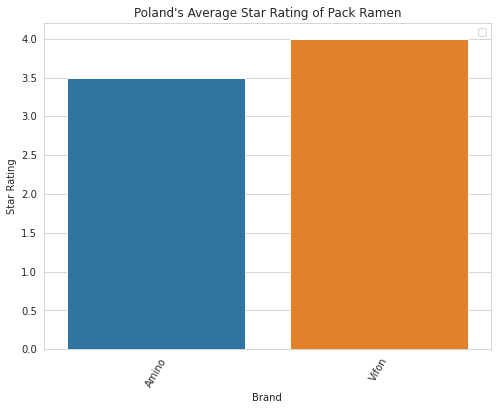

No handles with labels found to put in legend.


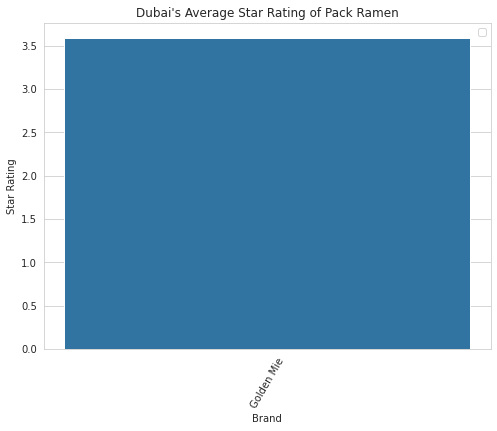

In [25]:
# Extracts data and loops through to produce 2 Series. One of Brands 
# and another of average ratings to plot a barplot.
def extract_info():

    data_wrangling()
    for country in list_of_countries:
        for style in list_of_styles:
            entry = data[(data.Country == country) & (data.Style == style)]       #dataframe
            
            brand_average_rating = entry.groupby('Brand').Stars.mean()            #Series
            sorted_brand_names = sorted(pd.Series(entry.Brand.unique()))          #Series
            
            if len(sorted_brand_names) > 0:                                       
                graph(country,style,sorted_brand_names,brand_average_rating)      
            else:                                                                 
                pass
    
extract_info()